## Прогнозирование с помощью нейронных сетей

1. Подготовка данных

In [1]:
import numpy
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)
plt.style.use('bmh')

In [2]:
ser_g = pd.read_csv('series_g.csv', sep=';', header=0)
ser_g.head()

,date,series_g
0,JAN 1949,112
1,FEB 1949,118
2,MAR 1949,132
3,APR 1949,129
4,MAY 1949,121


In [3]:
ser_g.shape

(144, 2)

<AxesSubplot:>

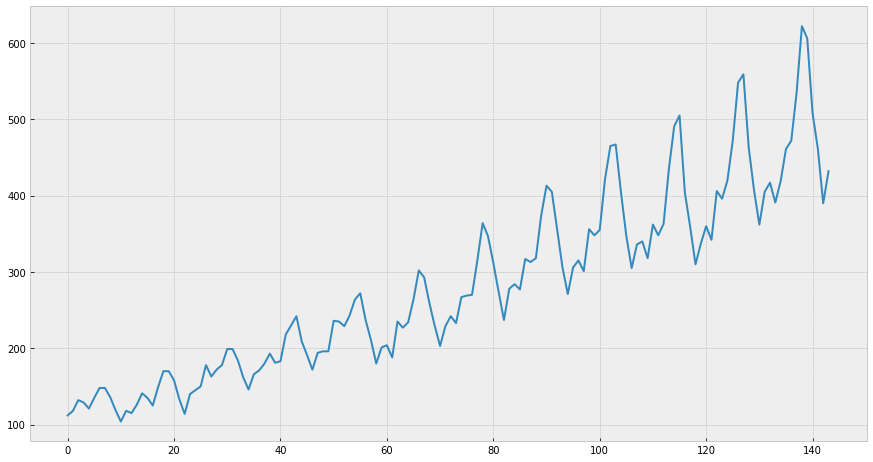

In [4]:
ser_g['series_g'].plot()

In [5]:
#  перейдем к логарифму, в ряде присутствует сезонность
ser_g['log_y'] = numpy.log10(ser_g['series_g'])

Text(0, 0.5, 'log10 от тысяч человек')

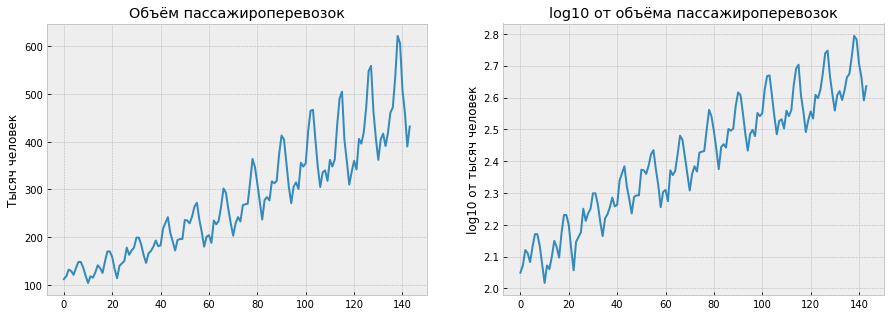

In [6]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121)
ser_g['series_g'].plot(ax=ax1)
ax1.set_title(u'Объём пассажироперевозок')
ax1.set_ylabel(u'Тысяч человек')

ax2 = fig.add_subplot(122)
pd.Series(ser_g['log_y']).plot(ax=ax2)
ax2.set_title(u'log10 от объёма пассажироперевозок')
ax2.set_ylabel(u'log10 от тысяч человек')


In [7]:
# преобразуем данные к нужному виду 

ser_g_2 = pd.DataFrame()
for i in range(12,0,-1):
    ser_g_2['t-'+str(i)] = ser_g.iloc[:,2].shift(i)

ser_g_2['t'] = ser_g.iloc[:,2].values
ser_g_2.head(13)

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.049218
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.049218,2.071882
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.049218,2.071882,2.120574
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.049218,2.071882,2.120574,2.110590
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.049218,2.071882,2.120574,2.110590,2.082785
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.049218,2.071882,2.120574,2.110590,2.082785,2.130334
6,NaN,NaN,NaN,NaN,NaN,NaN,2.049218,2.071882,2.120574,2.110590,2.082785,2.130334,2.170262
7,NaN,NaN,NaN,NaN,NaN,2.049218,2.071882,2.120574,2.110590,2.082785,2.130334,2.170262,2.170262
8,NaN,NaN,NaN,NaN,2.049218,2.071882,2.120574,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539
9,NaN,NaN,NaN,2.049218,2.071882,2.120574,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547


In [8]:
ser_g_4 = ser_g_2[12:]
ser_g_4.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
12,2.049218,2.071882,2.120574,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698
13,2.071882,2.120574,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371
14,2.120574,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371,2.149219
15,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371,2.149219,2.130334
16,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371,2.149219,2.130334,2.096910


In [9]:
# разделяем предикторы и отклик
y = ser_g_4['t']
X = ser_g_4.drop('t', axis=1)

In [10]:
#  разделяем на обучающую и тестовую выборки
X_train = X[:120]
y_train = y[:120]
X_test  = X[120:]
y_test  = y[120:]

In [11]:
X_train.head(5)

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
12,2.049218,2.071882,2.120574,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882
13,2.071882,2.120574,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698
14,2.120574,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371
15,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371,2.149219
16,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371,2.149219,2.130334


In [12]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

2. Обучение модели

In [13]:
from keras.models import Sequential
from keras.layers import Dense

from keras import optimizers
from keras import initializers

In [14]:
#  Обучение нейронной сети 

# ещё один вариант архитектуры
init_2 = initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=123)
#  init_3 = initializers.Constant(value = 1e-3)
#  model = Sequential()
#  model.add(Dense(8, input_dim=12, activation='relu', kernel_initializer=init_2, bias_initializer=init_3))
#  model.add(Dense(1, activation='linear', kernel_initializer=init_2, bias_initializer=init_3))

model = Sequential()
model.add(Dense(8, input_dim=12, activation='relu', kernel_initializer=init_2))
model.add(Dense(1, activation='linear')) # linear т к прогнозирование

# Compiling model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])

# Training a model
model.fit(X_train, y_train, epochs=300, batch_size=2)


Epoch 1/300
60/60 [==============================] - 0s 641us/step - loss: 0.5202 - mean_absolute_percentage_error: 20.9494
Epoch 2/300
60/60 [==============================] - 0s 820us/step - loss: 0.0041 - mean_absolute_percentage_error: 2.1175
Epoch 3/300
60/60 [==============================] - 0s 689us/step - loss: 0.0038 - mean_absolute_percentage_error: 2.1245
Epoch 4/300
60/60 [==============================] - 0s 684us/step - loss: 0.0036 - mean_absolute_percentage_error: 2.0429
Epoch 5/300
60/60 [==============================] - 0s 715us/step - loss: 0.0038 - mean_absolute_percentage_error: 2.0826
Epoch 6/300
60/60 [==============================] - 0s 688us/step - loss: 0.0037 - mean_absolute_percentage_error: 2.0358
Epoch 7/300
60/60 [==============================] - 0s 733us/step - loss: 0.0037 - mean_absolute_percentage_error: 2.0717
Epoch 8/300
60/60 [==============================] - 0s 695us/step - loss: 0.0037 - mean_absolute_percentage_error: 2.0214
Epoch 9/300
60/

60/60 [==============================] - 0s 619us/step - loss: 0.0028 - mean_absolute_percentage_error: 1.7651
Epoch 68/300
60/60 [==============================] - 0s 616us/step - loss: 0.0024 - mean_absolute_percentage_error: 1.6489
Epoch 69/300
60/60 [==============================] - 0s 581us/step - loss: 0.0023 - mean_absolute_percentage_error: 1.5218
Epoch 70/300
60/60 [==============================] - 0s 574us/step - loss: 0.0022 - mean_absolute_percentage_error: 1.5669
Epoch 71/300
60/60 [==============================] - 0s 571us/step - loss: 0.0024 - mean_absolute_percentage_error: 1.6581
Epoch 72/300
60/60 [==============================] - 0s 577us/step - loss: 0.0027 - mean_absolute_percentage_error: 1.6991
Epoch 73/300
60/60 [==============================] - 0s 610us/step - loss: 0.0025 - mean_absolute_percentage_error: 1.7209
Epoch 74/300
60/60 [==============================] - 0s 587us/step - loss: 0.0021 - mean_absolute_percentage_error: 1.5113
Epoch 75/300
60/60 [=

60/60 [==============================] - 0s 590us/step - loss: 0.0011 - mean_absolute_percentage_error: 1.1514
Epoch 133/300
60/60 [==============================] - 0s 587us/step - loss: 0.0014 - mean_absolute_percentage_error: 1.2689
Epoch 134/300
60/60 [==============================] - 0s 576us/step - loss: 0.0013 - mean_absolute_percentage_error: 1.2069
Epoch 135/300
60/60 [==============================] - 0s 577us/step - loss: 0.0015 - mean_absolute_percentage_error: 1.3307
Epoch 136/300
60/60 [==============================] - 0s 587us/step - loss: 0.0012 - mean_absolute_percentage_error: 1.1837
Epoch 137/300
60/60 [==============================] - 0s 591us/step - loss: 0.0013 - mean_absolute_percentage_error: 1.1806
Epoch 138/300
60/60 [==============================] - 0s 603us/step - loss: 0.0012 - mean_absolute_percentage_error: 1.2054
Epoch 139/300
60/60 [==============================] - 0s 612us/step - loss: 0.0013 - mean_absolute_percentage_error: 1.2515
Epoch 140/300


60/60 [==============================] - 0s 562us/step - loss: 9.9021e-04 - mean_absolute_percentage_error: 1.0737
Epoch 198/300
60/60 [==============================] - 0s 551us/step - loss: 9.3576e-04 - mean_absolute_percentage_error: 1.0327
Epoch 199/300
60/60 [==============================] - 0s 563us/step - loss: 0.0011 - mean_absolute_percentage_error: 1.1104
Epoch 200/300
60/60 [==============================] - 0s 596us/step - loss: 8.9921e-04 - mean_absolute_percentage_error: 1.0194
Epoch 201/300
60/60 [==============================] - 0s 575us/step - loss: 9.9177e-04 - mean_absolute_percentage_error: 1.0167
Epoch 202/300
60/60 [==============================] - 0s 573us/step - loss: 0.0014 - mean_absolute_percentage_error: 1.1919
Epoch 203/300
60/60 [==============================] - 0s 576us/step - loss: 0.0014 - mean_absolute_percentage_error: 1.2589
Epoch 204/300
60/60 [==============================] - 0s 556us/step - loss: 0.0012 - mean_absolute_percentage_error: 1.152

60/60 [==============================] - 0s 564us/step - loss: 0.0011 - mean_absolute_percentage_error: 1.0789
Epoch 262/300
60/60 [==============================] - 0s 561us/step - loss: 9.2966e-04 - mean_absolute_percentage_error: 1.0050
Epoch 263/300
60/60 [==============================] - 0s 571us/step - loss: 0.0010 - mean_absolute_percentage_error: 1.0507
Epoch 264/300
60/60 [==============================] - 0s 585us/step - loss: 0.0010 - mean_absolute_percentage_error: 1.0611
Epoch 265/300
60/60 [==============================] - 0s 567us/step - loss: 8.0698e-04 - mean_absolute_percentage_error: 0.9474
Epoch 266/300
60/60 [==============================] - 0s 576us/step - loss: 9.3947e-04 - mean_absolute_percentage_error: 1.0388
Epoch 267/300
60/60 [==============================] - 0s 560us/step - loss: 8.4875e-04 - mean_absolute_percentage_error: 1.0029
Epoch 268/300
60/60 [==============================] - 0s 571us/step - loss: 0.0011 - mean_absolute_percentage_error: 1.100

In [15]:
# оценка качества модели на тестовом множестве
scores = model.evaluate(X_test, y_test)
print("\nMAPE: %.2f%%" % (scores[1]))

1/1 [==============================] - 0s 972us/step - loss: 4.9428e-04 - mean_absolute_percentage_error: 0.6908

MAPE: 0.69%


In [16]:
# вычисляем прогноз на тестовых данных
predictions = model.predict(X_test)

In [17]:
# вычисляем подгонку
predictions_train = model.predict(X_train)

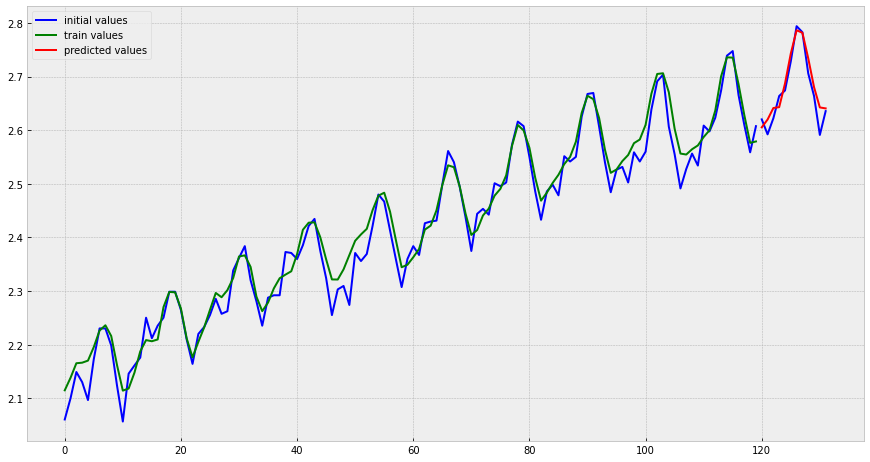

In [18]:
x2 = numpy.arange(0, 120, 1)
x3 = numpy.arange(120, 132, 1)

plt.plot(x2, y_train, label="initial values", c="b")
plt.plot(x2, predictions_train, label="train values", c="g")
plt.plot(x3, y_test,c="b")
plt.plot(x3, predictions, label="predicted values", c="r")
plt.legend()
plt.show()

## Построение прогноза в будущее

In [19]:
X_train = X
y_train = y

1. Обучение модели

In [20]:
# Обучаем сеть на всех данных
model = Sequential()
model.add(Dense(8, input_dim=12, activation='relu'))
model.add(Dense(1, activation='linear')) # linear т к прогнозирование

# Compiling model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])


# Training a model
# model.fit(X_train, y_train, epochs=300, batch_size=7)
model.fit(X_train, y_train, epochs=300, batch_size=1)

Epoch 1/300
132/132 [==============================] - 0s 659us/step - loss: 4.8502 - mean_absolute_percentage_error: 82.1196
Epoch 2/300
132/132 [==============================] - 0s 615us/step - loss: 0.1382 - mean_absolute_percentage_error: 12.4675
Epoch 3/300
132/132 [==============================] - 0s 625us/step - loss: 0.0030 - mean_absolute_percentage_error: 1.7095
Epoch 4/300
132/132 [==============================] - 0s 606us/step - loss: 0.0024 - mean_absolute_percentage_error: 1.6010
Epoch 5/300
132/132 [==============================] - 0s 604us/step - loss: 0.0024 - mean_absolute_percentage_error: 1.6054
Epoch 6/300
132/132 [==============================] - 0s 603us/step - loss: 0.0024 - mean_absolute_percentage_error: 1.6041
Epoch 7/300
132/132 [==============================] - 0s 606us/step - loss: 0.0025 - mean_absolute_percentage_error: 1.6080
Epoch 8/300
132/132 [==============================] - 0s 606us/step - loss: 0.0024 - mean_absolute_percentage_error: 1.625

132/132 [==============================] - 0s 579us/step - loss: 0.0024 - mean_absolute_percentage_error: 1.6002
Epoch 67/300
132/132 [==============================] - 0s 565us/step - loss: 0.0026 - mean_absolute_percentage_error: 1.6793
Epoch 68/300
132/132 [==============================] - 0s 570us/step - loss: 0.0024 - mean_absolute_percentage_error: 1.6375
Epoch 69/300
132/132 [==============================] - 0s 575us/step - loss: 0.0024 - mean_absolute_percentage_error: 1.5981
Epoch 70/300
132/132 [==============================] - 0s 564us/step - loss: 0.0024 - mean_absolute_percentage_error: 1.6113
Epoch 71/300
132/132 [==============================] - 0s 580us/step - loss: 0.0025 - mean_absolute_percentage_error: 1.5990
Epoch 72/300
132/132 [==============================] - 0s 586us/step - loss: 0.0022 - mean_absolute_percentage_error: 1.5553
Epoch 73/300
132/132 [==============================] - 0s 587us/step - loss: 0.0023 - mean_absolute_percentage_error: 1.5570
Epoch

132/132 [==============================] - 0s 573us/step - loss: 0.0019 - mean_absolute_percentage_error: 1.4421
Epoch 131/300
132/132 [==============================] - 0s 555us/step - loss: 0.0019 - mean_absolute_percentage_error: 1.4460
Epoch 132/300
132/132 [==============================] - 0s 569us/step - loss: 0.0020 - mean_absolute_percentage_error: 1.4638
Epoch 133/300
132/132 [==============================] - 0s 566us/step - loss: 0.0020 - mean_absolute_percentage_error: 1.5011
Epoch 134/300
132/132 [==============================] - 0s 618us/step - loss: 0.0018 - mean_absolute_percentage_error: 1.4581
Epoch 135/300
132/132 [==============================] - 0s 588us/step - loss: 0.0020 - mean_absolute_percentage_error: 1.4847
Epoch 136/300
132/132 [==============================] - 0s 594us/step - loss: 0.0018 - mean_absolute_percentage_error: 1.3852
Epoch 137/300
132/132 [==============================] - 0s 586us/step - loss: 0.0020 - mean_absolute_percentage_error: 1.485

132/132 [==============================] - 0s 574us/step - loss: 0.0016 - mean_absolute_percentage_error: 1.3708
Epoch 195/300
132/132 [==============================] - 0s 566us/step - loss: 0.0014 - mean_absolute_percentage_error: 1.2386
Epoch 196/300
132/132 [==============================] - 0s 551us/step - loss: 0.0017 - mean_absolute_percentage_error: 1.3437
Epoch 197/300
132/132 [==============================] - 0s 583us/step - loss: 0.0016 - mean_absolute_percentage_error: 1.3256
Epoch 198/300
132/132 [==============================] - 0s 570us/step - loss: 0.0014 - mean_absolute_percentage_error: 1.2510
Epoch 199/300
132/132 [==============================] - 0s 585us/step - loss: 0.0017 - mean_absolute_percentage_error: 1.4200
Epoch 200/300
132/132 [==============================] - 0s 570us/step - loss: 0.0015 - mean_absolute_percentage_error: 1.2718
Epoch 201/300
132/132 [==============================] - 0s 570us/step - loss: 0.0017 - mean_absolute_percentage_error: 1.342

132/132 [==============================] - 0s 574us/step - loss: 0.0013 - mean_absolute_percentage_error: 1.2167
Epoch 259/300
132/132 [==============================] - 0s 573us/step - loss: 0.0016 - mean_absolute_percentage_error: 1.3279
Epoch 260/300
132/132 [==============================] - 0s 564us/step - loss: 0.0015 - mean_absolute_percentage_error: 1.2869
Epoch 261/300
132/132 [==============================] - 0s 582us/step - loss: 0.0013 - mean_absolute_percentage_error: 1.1544
Epoch 262/300
132/132 [==============================] - 0s 591us/step - loss: 0.0013 - mean_absolute_percentage_error: 1.2279
Epoch 263/300
132/132 [==============================] - 0s 590us/step - loss: 0.0012 - mean_absolute_percentage_error: 1.1974
Epoch 264/300
132/132 [==============================] - 0s 585us/step - loss: 0.0015 - mean_absolute_percentage_error: 1.2856
Epoch 265/300
132/132 [==============================] - 0s 588us/step - loss: 0.0013 - mean_absolute_percentage_error: 1.202

In [21]:
# оценка качества на обучении
scores = model.evaluate(X_train, y_train)
print("\nMAPE: %.2f%%" % (scores[1]))

5/5 [==============================] - 0s 901us/step - loss: 0.0013 - mean_absolute_percentage_error: 1.2162

MAPE: 1.22%


In [22]:
predictions_train = model.predict(X_train).reshape(132)

2. Постоение прогноза

In [23]:
# используем спрогнозированные значения для построения следующего прогноза
forecast = X_train.tail(1).values
for i in range(0, 12):
    pred = model.predict(forecast)[0,0]
    forecast = np.append(forecast.reshape(12)[1:], pred).reshape(1,12) 

In [24]:
forecast[0]

array([2.6078589 , 2.60571861, 2.5997324 , 2.62626505, 2.6597929 ,
       2.71039343, 2.75479126, 2.78619051, 2.75685716, 2.71667075,
       2.67756844, 2.6349194 ])

3. Визуализация результата

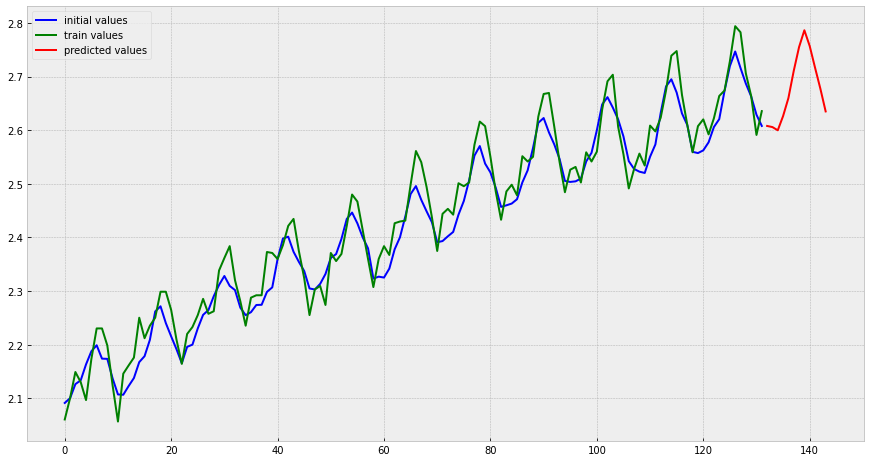

In [25]:
# визуализация в логарифмах
x2 = numpy.arange(0, 132, 1)
x3 = numpy.arange(132, 144, 1)

plt.plot(x2, predictions_train, color='b', label="initial values")
plt.plot(x2, y_train, color='g', label="train values")
plt.plot(x3, forecast[0], color='r', label="predicted values")
plt.legend()
plt.show()

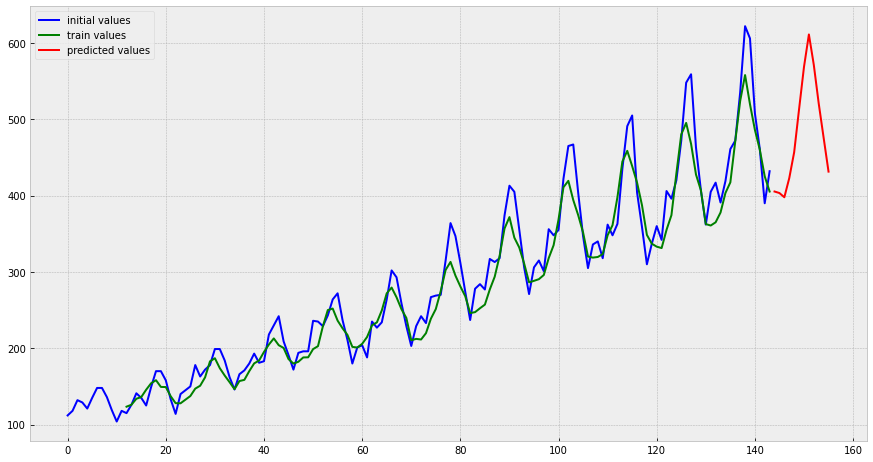

In [26]:
# переход к истинным значениям ряда
x2 = numpy.arange(0, 144, 1)
xx = numpy.arange(12, 144, 1)
x3 = numpy.arange(144, 156, 1)

plt.plot(x2, ser_g['series_g'], color='b', label="initial values" )
plt.plot(xx, 10**predictions_train, color='g', label="train values")
plt.plot(x3, 10**forecast[0], color='r', label="predicted values")
plt.legend()
plt.show()